In [2]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.linear_model import LinearRegression
from pandas import DataFrame
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [57]:
data=pd.read_csv(r'C:\Users\Элина\Desktop\Учеба\ТМО\states_all_extended.csv') # импорт датасета
data

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,247.0,278.0,286.0,315.0,NaN,NaN,NaN,NaN,269.0,293.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,248.0,267.0,285.0,315.0,237.0,259.0,NaN,NaN,263.0,292.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.0,NaN
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,251.0,273.0,277.0,294.0,253.0,267.0,NaN,NaN,268.0,276.0


In [7]:
data.isnull().sum()

PRIMARY_KEY                0
STATE                      0
YEAR                       0
ENROLL                   491
TOTAL_REVENUE            440
                        ... 
G08_AM_A_MATHEMATICS    1655
G08_HP_A_READING        1701
G08_HP_A_MATHEMATICS    1702
G08_TR_A_READING        1574
G08_TR_A_MATHEMATICS    1570
Length: 266, dtype: int64

In [8]:
total_count = data.shape[0]
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка ENROLL. Тип данных float64. Количество пустых значений 491, 28.63%.
Колонка TOTAL_REVENUE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка FEDERAL_REVENUE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка STATE_REVENUE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка LOCAL_REVENUE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка TOTAL_EXPENDITURE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка INSTRUCTION_EXPENDITURE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка SUPPORT_SERVICES_EXPENDITURE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка OTHER_EXPENDITURE. Тип данных float64. Количество пустых значений 491, 28.63%.
Колонка CAPITAL_OUTLAY_EXPENDITURE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка A_A_A. Тип данных float64. Количество пустых значений 83, 4.84%.
Колонка G01_A_A. Тип данных float64. Количество пустых з

In [58]:
cols=["STATE","YEAR","ENROLL", "TOTAL_REVENUE","FEDERAL_REVENUE","STATE_REVENUE","TOTAL_EXPENDITURE","INSTRUCTION_EXPENDITURE",
      "CAPITAL_OUTLAY_EXPENDITURE", "G01_A_A","G06_A_A","G12_A_A","KG_A_A","PK_A_A"]

In [59]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
for column in ["ENROLL", "TOTAL_REVENUE","FEDERAL_REVENUE","STATE_REVENUE","TOTAL_EXPENDITURE","INSTRUCTION_EXPENDITURE",
      "CAPITAL_OUTLAY_EXPENDITURE", "G01_A_A","G06_A_A","G12_A_A","KG_A_A","PK_A_A"]:
    imp_mean.fit(data[[column]])
    data[column] = imp_mean.transform(data[[column]])

In [62]:
LE = LabelEncoder()
for column in ["STATE"]:
    data[column] = LE.fit_transform(data[column])
data

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,0,1992,917541.566176,2.678885e+06,3.041770e+05,1.659028e+06,715680.0,2.653798e+06,1.481703e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992_ALASKA,1,1992,917541.566176,1.049591e+06,1.067800e+05,7.207110e+05,222100.0,9.724880e+05,4.983620e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,2,1992,917541.566176,3.258079e+06,2.978880e+05,1.369815e+06,1590376.0,3.401580e+06,1.435908e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992_ARKANSAS,3,1992,917541.566176,1.711959e+06,1.785710e+05,9.587850e+05,574603.0,1.743022e+06,9.643230e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992_CALIFORNIA,4,1992,917541.566176,2.626002e+07,2.072470e+06,1.654651e+07,7641041.0,2.713883e+07,1.435892e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,48,2019,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,NaN,9.206242e+06,4.768010e+06,...,247.0,278.0,286.0,315.0,NaN,NaN,NaN,NaN,269.0,293.0
1711,2019_WASHINGTON,49,2019,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,NaN,9.206242e+06,4.768010e+06,...,248.0,267.0,285.0,315.0,237.0,259.0,NaN,NaN,263.0,292.0
1712,2019_WEST_VIRGINIA,50,2019,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,NaN,9.206242e+06,4.768010e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.0,NaN
1713,2019_WISCONSIN,51,2019,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,NaN,9.206242e+06,4.768010e+06,...,251.0,273.0,277.0,294.0,253.0,267.0,NaN,NaN,268.0,276.0


In [63]:
data1 = data[cols]
data1

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,G01_A_A,G06_A_A,G12_A_A,KG_A_A,PK_A_A
0,0,1992,917541.566176,2.678885e+06,3.041770e+05,1.659028e+06,2.653798e+06,1.481703e+06,1.740530e+05,58168.000000,59929.000000,41167.000000,55460.00000,8224.000000
1,1,1992,917541.566176,1.049591e+06,1.067800e+05,7.207110e+05,9.724880e+05,4.983620e+05,3.745100e+04,11030.000000,9542.000000,6714.000000,10152.00000,2371.000000
2,2,1992,917541.566176,3.258079e+06,2.978880e+05,1.369815e+06,3.401580e+06,1.435908e+06,6.091140e+05,58914.000000,53832.000000,37410.000000,53497.00000,2544.000000
3,3,1992,917541.566176,1.711959e+06,1.785710e+05,9.587850e+05,1.743022e+06,9.643230e+05,1.452120e+05,34929.000000,35017.000000,27651.000000,33511.00000,808.000000
4,4,1992,917541.566176,2.626002e+07,2.072470e+06,1.654651e+07,2.713883e+07,1.435892e+07,2.044688e+06,443955.000000,399776.000000,270675.000000,431763.00000,59067.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,48,2019,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,9.206242e+06,4.768010e+06,9.034675e+05,71699.145221,68720.131127,58420.870711,68810.96201,17840.958495
1711,49,2019,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,9.206242e+06,4.768010e+06,9.034675e+05,71699.145221,68720.131127,58420.870711,68810.96201,17840.958495
1712,50,2019,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,9.206242e+06,4.768010e+06,9.034675e+05,71699.145221,68720.131127,58420.870711,68810.96201,17840.958495
1713,51,2019,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,9.206242e+06,4.768010e+06,9.034675e+05,71699.145221,68720.131127,58420.870711,68810.96201,17840.958495


<AxesSubplot:>

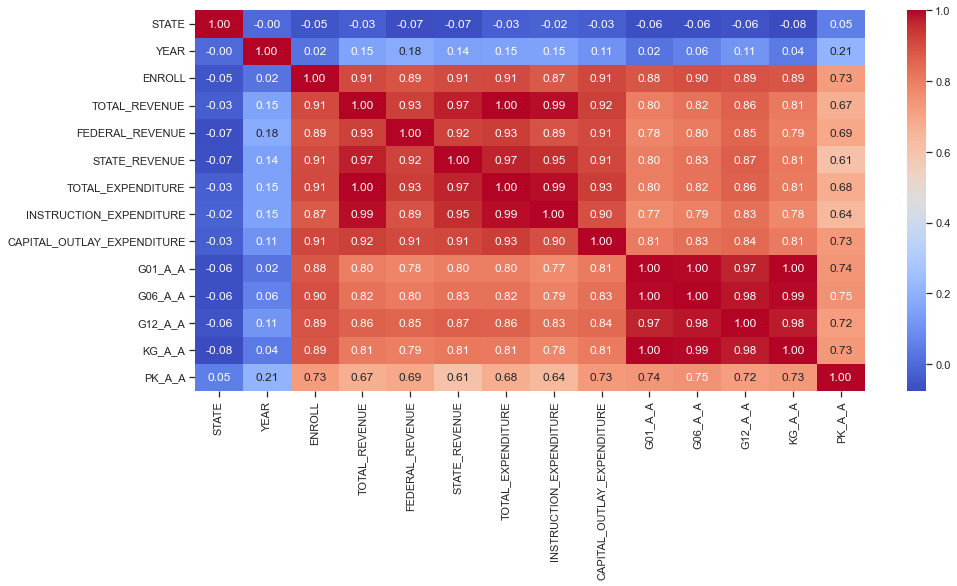

In [129]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data1.corr(method='pearson'), ax=ax, annot=True, cmap='coolwarm', fmt='.2f')

In [124]:
xArray = data1.drop(["ENROLL","STATE","YEAR","PK_A_A"], axis=1)
yArray = data1["ENROLL"]
xArray

,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,G01_A_A,G06_A_A,G12_A_A,KG_A_A
0,2.678885e+06,3.041770e+05,1.659028e+06,2.653798e+06,1.481703e+06,1.740530e+05,58168.000000,59929.000000,41167.000000,55460.00000
1,1.049591e+06,1.067800e+05,7.207110e+05,9.724880e+05,4.983620e+05,3.745100e+04,11030.000000,9542.000000,6714.000000,10152.00000
2,3.258079e+06,2.978880e+05,1.369815e+06,3.401580e+06,1.435908e+06,6.091140e+05,58914.000000,53832.000000,37410.000000,53497.00000
3,1.711959e+06,1.785710e+05,9.587850e+05,1.743022e+06,9.643230e+05,1.452120e+05,34929.000000,35017.000000,27651.000000,33511.00000
4,2.626002e+07,2.072470e+06,1.654651e+07,2.713883e+07,1.435892e+07,2.044688e+06,443955.000000,399776.000000,270675.000000,431763.00000
...,...,...,...,...,...,...,...,...,...,...
1710,9.102045e+06,7.677799e+05,4.223743e+06,9.206242e+06,4.768010e+06,9.034675e+05,71699.145221,68720.131127,58420.870711,68810.96201
1711,9.102045e+06,7.677799e+05,4.223743e+06,9.206242e+06,4.768010e+06,9.034675e+05,71699.145221,68720.131127,58420.870711,68810.96201
1712,9.102045e+06,7.677799e+05,4.223743e+06,9.206242e+06,4.768010e+06,9.034675e+05,71699.145221,68720.131127,58420.870711,68810.96201
1713,9.102045e+06,7.677799e+05,4.223743e+06,9.206242e+06,4.768010e+06,9.034675e+05,71699.145221,68720.131127,58420.870711,68810.96201


In [125]:
trainX, testX, trainY, testY = train_test_split(xArray, yArray, test_size=0.1, random_state=1)

In [126]:
#Линейная регрессия
model1 = LinearRegression(normalize=True)
model1.fit(trainX, trainY)

LinearRegression(normalize=True)

In [127]:
y_test_predict_LR = model1.predict(testX)
y_test_predict_LR

array([1983588.82648057,  443339.57153127,  235967.45529629,
        679636.26057594, 2004474.47547945, 2965255.04049319,
        735084.61450535,  491735.64073718, 2680161.64539013,
        773713.59342328,  401741.65231194,  798052.00208166,
        215101.01095928,  688453.20741952, 3807453.73298959,
        474723.13906104,  199508.79199588,  782935.04307022,
        779136.83171705,  583008.55546649,  916651.80541114,
        847924.44246123,  310879.53903866, 1058300.14406639,
        295034.98120554,  759476.21184398,  916651.80541114,
        241129.08830254,  839736.69191394,  742676.12720593,
        668255.11439305,  806111.84617609, 3219813.86246465,
        944536.4359178 , 2054692.62395223,  958063.83138969,
        683254.36279629,  807651.17042693,  177542.23421354,
        900461.08752499,  794673.59685552, 1682617.07379861,
       1068818.63894029,  755734.05490344,  736538.76923008,
        773252.4601638 ,  962817.37413001,  580092.09724947,
       1764366.27862559,

In [144]:
print('RMSE:', mean_squared_error(y_test_predict_LR, testY, squared=False))
print('MAE:', (mean_absolute_error(testY, y_test_predict_LR)))

RMSE: 179296.29262567617
MAE: 129564.10776981147


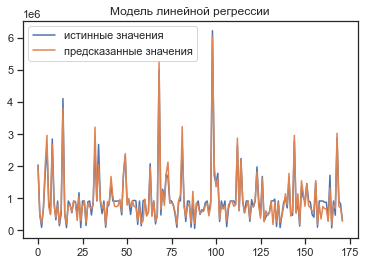

In [131]:
x_ax = range(len(testY))
plt.plot(x_ax, testY, label="истинные значения")
plt.plot(x_ax, y_test_predict_LR, label="предсказанные значения")
plt.title("Модель линейной регрессии")
plt.legend()
plt.show()

In [137]:
x_Array = data1.drop(["ENROLL","STATE","YEAR","PK_A_A"], axis=1)
y_Array = data1["ENROLL"]
train_X, test_X, train_Y, test_Y = train_test_split(x_Array, y_Array, test_size=0.2, random_state=1)

In [138]:
#градиентный бустинг
from xgboost import XGBRegressor
model2 = XGBRegressor( booster='gbtree', max_depth=4)
model2.fit(train_X, train_Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [139]:
score = model2.score(train_X, train_Y) 
print("Training score: ", score)

Training score:  0.9996040600407091


In [140]:
y_test_predict_XGBR = model2.predict(test_X)
y_test_predict_XGBR

array([1799708.5  ,  520878.06 ,   98067.46 ,  727532.94 , 1671415.   ,
       2743484.8  ,  917339.7  ,  544695.56 , 2973854.2  ,  929720.1  ,
        701361.25 ,  914554.75 ,  138678.67 ,  552195.7  , 4159593.2  ,
        532971.6  ,   95161.07 ,  904491.5  ,  827691.2  ,  535084.5  ,
        917765.56 ,  888073.25 ,  448956.16 , 1223758.2  ,  110665.11 ,
        914626.06 ,  917765.56 ,  158237.84 ,  896542.75 ,  914626.06 ,
        530104.25 ,  922221.44 , 2804736.   ,  929290.1  , 2418474.8  ,
        924772.6  ,  548007.25 ,  845432.06 ,  107459.305,  703655.56 ,
        819255.1  , 1493305.8  ,  936337.1  ,  910465.3  ,  856046.94 ,
        920179.6  ,  919470.1  ,  507115.97 , 1882098.2  , 2158425.5  ,
        922119.6  ,  902418.75 ,  496877.34 ,  917765.56 ,  939377.4  ,
        899222.2  ,  204492.69 ,  913413.94 ,  133449.61 ,  542400.44 ,
        928194.06 ,  660562.7  ,  596398.9  , 2061615.1  ,  521845.8  ,
        917765.56 ,  207987.61 ,  508658.28 , 5112961.5  ,  5274

In [143]:
print('RMSE:', mean_squared_error(y_test_predict_XGBR, test_Y, squared=False))
print('MAE:', (mean_absolute_error(y_test_predict_XGBR, test_Y)))

RMSE: 119535.3872361927
MAE: 50205.08998376136


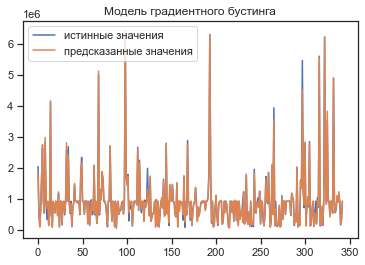

In [148]:
x_ax = range(len(test_Y))
plt.plot(x_ax, test_Y, label="истинные значения")
plt.plot(x_ax, y_test_predict_XGBR, label="предсказанные значения")
plt.title("Модель градиентного бустинга")
plt.legend()
plt.show()

In [149]:
print('Метрики линейной регрессии')
print('RMSE:', mean_squared_error(y_test_predict_LR, testY, squared=False))
print('MAE:', (mean_absolute_error(testY, y_test_predict_LR)))
print('\nМетрики градиентного бустинга')
print('RMSE:', mean_squared_error(y_test_predict_XGBR, test_Y, squared=False))
print('MAE:', (mean_absolute_error(y_test_predict_XGBR, test_Y)))

Метрики линейной регрессии
RMSE: 179296.29262567617
MAE: 129564.10776981147

Метрики градиентного бустинга
RMSE: 119535.3872361927
MAE: 50205.08998376136


Были выбраны метрики корень среднеквадратичной ошибки и средняя абсолютная ошибка.

В данном случае лучше сработал метод градиентного спуска, т.к. значения его метрик меньше.